# Regressão Linear Univariada

## Exercício 1
Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?


2) O RSS e R^2 corroboram suas impressões observando o modelo?




### Importando bibliotecas

In [37]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

### Criando funções

In [38]:
# Criando métricas RSS e R²
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [49]:
def reg_linear(dados, atributo_independente, atributo_dependente):
    'Função responsável por separar os dados, realizar a regressão e plotar as informações'
    
    # Separando os valores preditores/independentes (X) e resposta/dependentes (y) 
    X = dados.loc[:,[atributo_independente]]
    y = dados.loc[:,[atributo_dependente]]
    
    # Treinando o modelo e fazendo predição
    reg = LinearRegression().fit(X,y)
    y_pred = reg.predict(X)
    
    # Plotando dados
    plt.scatter(X, y,color='g')
    plt.plot(X, y_pred,color='k')
    plt.xlabel(atributo_independente)
    plt.ylabel(atributo_dependente)
    
    # Mostrando resultados através das métricas R² E RSS
    rss = calc_rss(y,y_pred)
    r2 = calc_r2(y,y_pred)
    print('Métrica RSS:', rss)
    print(f'Métrica R²: {r2}')

###  Regressão utilizando o atributo quartos

Métrica RSS: 578535325112.5249
Métrica R²: -3.112607855431998


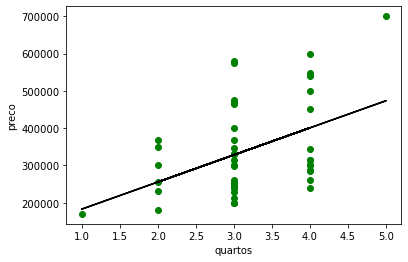

In [50]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)

quartos = reg_linear(dados_por, 'quartos', 'preco')

### Regressão utilizando o atributo tamanho

Métrica RSS: 193464477600.7059
Métrica R²: 0.6320180251851149


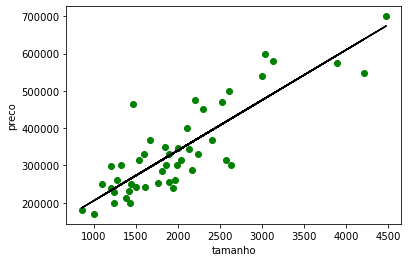

In [51]:
tamanho = reg_linear(dados_por, 'tamanho', 'preco')

### Conclusão

O atributo mais razoável é o tamanho das casas, com o número de quartos o aprendizado foi ruim devido aos dados não possuírem uma forma linear pois são dados discretos, já com o tamanho foi possível obter um melhor aprendizado.



In [14]:
import numpy as np
dados = np.array([[1, 1], [2, 3], [3, 3], [4, 5], [5, 5], [6, 7], [7, 7]])

In [15]:
df = pd.DataFrame(data=dados, columns=['A', 'B'])
df


,A,B
0,1,1
1,2,3
2,3,3
3,4,5
4,5,5
5,6,7
6,7,7


In [16]:
# SEPARANDO OS VALORES PREDITORES/INDEPENDENTES (X) E RESPOSTA/DEPENDENTES (Y)
X = df.loc[:,['A']]
y = df.loc[:,['B']]

#TREINANDO O MODELO
reg = LinearRegression().fit(X,y)

# PREDIÇÃO
y_hat = reg.predict(X[0:4])
y_hat


array([[1.42857143],
       [2.42857143],
       [3.42857143],
       [4.42857143]])

Text(0, 0.5, 'B')

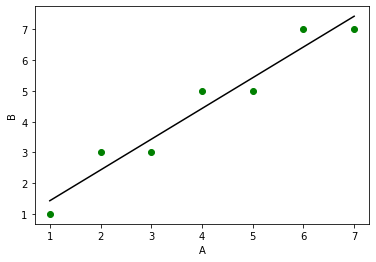

In [17]:
plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('A')
plt.ylabel('B')

In [18]:
# Avaliando o modelo
def calc_r2(y,predicted):
    return r2_score(predicted,y)

rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))
print(rss)
print(r2)

1.7142857142857142
0.9387755102040817


array([[ 8.42857143],
       [ 9.42857143],
       [10.42857143],
       [11.42857143],
       [12.42857143],
       [13.42857143]])

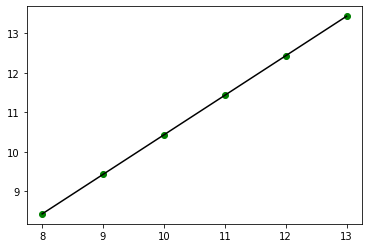

In [19]:
d_t = np.array([[8], [9], [10], [11], [12], [13]])

# PREDIÇÃO
y_t = reg.predict(d_t)
plt.scatter(d_t, y_t,color='g')
plt.plot(d_t, y_t,color='k')
y_t

## Exercício 2

Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

2) Qual dos modelos é melhor? como você chegou a esta conclusão?

###  Regressão utilizando o atributo TV

Métrica RSS: 2102.5305831313512
Métrica R²: 0.3656794003764149


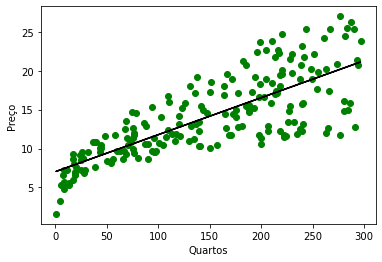

In [43]:
# Abrindo arquivo csv Advertising
dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)

tv = reg_linear(dados_adv, 'TV', 'sales')

###  Regressão utilizando o atributo rádio

Métrica RSS: 3618.479549025088
Métrica R²: -1.0117537716572929


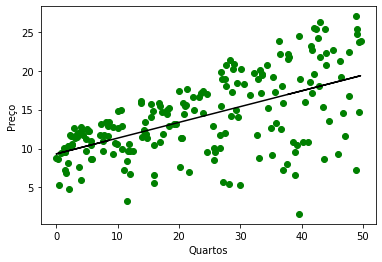

In [44]:
radio = reg_linear(dados_adv, 'radio', 'sales')

###  Regressão utilizando o atributo newspaper

Métrica RSS: 5134.804544111939
Métrica R²: -17.18632873290735


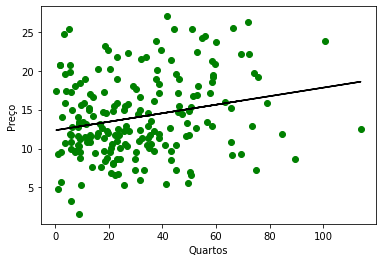

In [45]:
newspaper = reg_linear(dados_adv, 'newspaper', 'sales')

### Conclusão

O melhor modelo foi o aprendido com o atributo TV pois possue melhor predição e possui uma melhor metrica do R².

## Exercício 3

1. Utilizando a API do scikit-learn para criação de partições de treino e teste, refaça a sua regressão nas partições de treino e faça a validação nas partições de teste.

    1. Comparar os resultados na partição de treino e teste;
    1. Comparar desempenho com a regressão na qual não foi feita a separação entre treino e teste. Você acha que o desempenho deveria ser melhor ou pior nesse caso? É possível dizer que os modelos treinados no dataset completo generalizam?


### Função para treinar o regressor linear com separação de treino e teste

In [52]:
def reg_linear_treino_teste(dados, atributo_independente, atributo_dependente):
    # Separando os valores preditores/independentes (X) e resposta/dependentes (y) 
    X = dados.loc[:,[atributo_independente]]
    y = dados.loc[:,[atributo_dependente]]

    # Separando o dataset para treino e para teste
    from sklearn.model_selection import train_test_split
    x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.33, random_state=42)

    # Treinando o modelo e fazendo predição
    reg = LinearRegression().fit(x_treino,y_treino)
    y_pred = reg.predict(x_teste)

    # Plotando dados
    plt.scatter(X, y,color='g')
    plt.plot(x_teste, y_pred,color='k')
    plt.xlabel(atributo_independente)
    plt.ylabel(atributo_dependente)

    # Mostrando resultados através das métricas R² E RSS
    rss = calc_rss(y_teste,y_pred)
    r2 = calc_r2(y_teste,y_pred)
    print('Métrica RSS:', rss)
    print(f'Métrica R²: {r2}')

### Treinando o modelo com o dataset Portland_housePrices.csv separado com os dados de tamanho e preço 

Métrica RSS: 134086682901.24934
Métrica R²: 0.39301821331700204


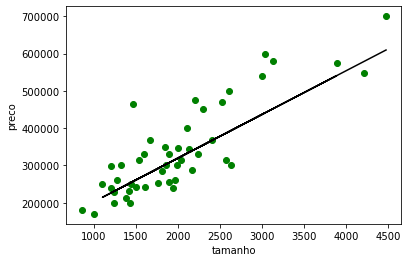

In [53]:
tamanho = reg_linear_treino_teste(dados_por, 'tamanho', 'preco')

O resultado foi pior do que o treino com o dataset inteiro


### Treinando o modelo com o dataset Advertising.csv separado com os dados de TV e sales 

Métrica RSS: 641.0056895300172
Métrica R²: 0.4750669183777888


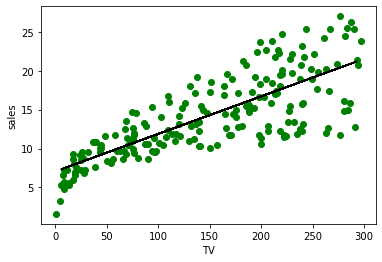

In [54]:
tv = reg_linear_treino_teste(dados_adv, 'TV', 'sales')

O resultado foi melhor do que o treino com o dataset inteiro

### Conclusão

O dataset Advertising.csv tem 200 amostras e o da portland tem apenas 48, então para a divisão do dataset quanto mais dados tiver melhor será o treino, caso tenha poucos dados o treino com divisão ficará pior.